# Proyecto 2 

github: [link aqui](https://github.com/DanielRasho/MD-Proyecto2)

## Imports

In [68]:
# Core Libraries
import random

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical Analysis
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import normaltest

# Machine Learning - Scikit-learn
from sklearn import datasets, metrics, tree
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import (
    confusion_matrix, explained_variance_score, mean_absolute_error, 
    mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score
)
from sklearn.model_selection import (
    GridSearchCV, ShuffleSplit, cross_validate, train_test_split
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree

# Model Evaluation & Utilities
import setuptools.dist
from yellowbrick.regressor import ResidualsPlot

## Cargado de datos


In [4]:
df = pd.read_csv('./data/train.csv')

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Limpieza de datos

Primero, se realiza una descripción del dataset para obtener un resumen estadístico de los datos. Esto nos permite identificar la distribución de las variables, sus valores mínimos y máximos, la media, la mediana y la desviación estándar. Además, nos ayuda a detectar posibles valores atípicos y comprender mejor la escala de los datos antes de realizar cualquier limpieza o transformación.

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


Primero, es importante eliminar las filas que contienen datos incompletos. Para ello, contaremos cuántos valores nulos hay en cada columna. Esto nos permitirá determinar si la cantidad de filas con valores faltantes es insignificante. Si encontramos columnas con un número excesivo de valores nulos (según nuestro criterio, más de 40), estas deberán ser eliminadas.

In [6]:
# Encontrar las columnas que tienen los mayores valores nulos
NAValues = [(col, count, (count / len(df)) * 100) for col, count in df.isnull().sum().items() if count > 0]

NAVariablesStats = pd.DataFrame(NAValues, columns=["Variable", "Count", "Percentage"])
NAVariablesStats = NAVariablesStats.sort_values("Count", ascending=False)
NAVariablesStats

,Variable,Count,Percentage
16,PoolQC,1453,99.520548
18,MiscFeature,1406,96.301370
1,Alley,1369,93.767123
17,Fence,1179,80.753425
2,MasVnrType,872,59.726027
10,FireplaceQu,690,47.260274
0,LotFrontage,259,17.739726
11,GarageType,81,5.547945
12,GarageYrBlt,81,5.547945
13,GarageFinish,81,5.547945


In [7]:
# Encontrar las columnas que tienen los mayores valores nulos
NAValues = [(col, count, (count / len(df)) * 100) for col, count in df.isnull().sum().items() if count > 0]

NAVariablesStats = pd.DataFrame(NAValues, columns=["Variable", "Count", "Percentage"])
NAVariablesStats = NAVariablesStats.sort_values("Count", ascending=False)
NAVariablesStats

,Variable,Count,Percentage
16,PoolQC,1453,99.520548
18,MiscFeature,1406,96.301370
1,Alley,1369,93.767123
17,Fence,1179,80.753425
2,MasVnrType,872,59.726027
10,FireplaceQu,690,47.260274
0,LotFrontage,259,17.739726
11,GarageType,81,5.547945
12,GarageYrBlt,81,5.547945
13,GarageFinish,81,5.547945


In [8]:
# Encontrar las columnas que tienen los mayores valores nulos
NAValues = [(col, count, (count / len(df)) * 100) for col, count in df.isnull().sum().items() if count > 0]

NAVariablesStats = pd.DataFrame(NAValues, columns=["Variable", "Count", "Percentage"])
NAVariablesStats = NAVariablesStats.sort_values("Count", ascending=False)
NAVariablesStats

,Variable,Count,Percentage
16,PoolQC,1453,99.520548
18,MiscFeature,1406,96.301370
1,Alley,1369,93.767123
17,Fence,1179,80.753425
2,MasVnrType,872,59.726027
10,FireplaceQu,690,47.260274
0,LotFrontage,259,17.739726
11,GarageType,81,5.547945
12,GarageYrBlt,81,5.547945
13,GarageFinish,81,5.547945


### Criterios de eliminacion de columnas

Dado que el dataset contiene una gran cantidad de datos, primero realizamos una búsqueda para identificar las columnas con al menos un valor nulo. Posteriormente, analizamos el porcentaje de valores faltantes en cada una de estas columnas. Si el porcentaje de datos nulos era significativo (considerado alto según nuestro criterio), decidimos eliminarlas para evitar sesgos en el análisis y mejorar la calidad de los datos.

### Columas eliminadas
Las siguientes columnas fueron eliminadas debido a su alto porcentaje de valores nulos, tanto en training como testing:

* PoolQC → 99.52% de datos nulos.
* MiscFeature → 96.30% de datos nulos.
* Alley → 93.77% de datos nulos.
* Fence → 80.75% de datos nulos.
* MasVnrType → 59.73% de datos nulos.
* FireplaceQu → 47.26% de datos nulos.
* GarageQual → 5.55% de datos nulos.
* Id -> Es una variable insignificante que no nos aporta nada.

### Posteriormente

Al ya no existir columnas con un alto numero de valores nulos, ya nos podemos deshacer de las filas que estan incompletas.

In [9]:
# Quitar las columnas con mayor porcentaje de nulos
df.drop(['Id', "Alley", "MasVnrType", "FireplaceQu", "GarageQual", "PoolQC", "Fence", "MiscFeature" ], axis=1, inplace=True)
# Ahora ya se pueden quitar las filas con NA porque son muy pocos
df_cleaned = df.dropna()

In [10]:
# Asegurar que no hayan valores nulos
NAValues = list(df_cleaned.isnull().sum() / len(df_cleaned))
list(value for value in NAValues if value > 0)

[]

Después de obtener un dataset más limpio, el siguiente paso fue analizar su estructura con mayor detalle. Para ello, verificamos la cantidad de filas y columnas restantes, lo que nos permitió entender la dimensión de los datos después del proceso de limpieza.

Además, realizamos una nueva inspección en busca de datos duplicados, junto con los tipos de datos para tener una mejor compresion y asi para evitar cualquier tipo de sesgo.

## Clasificación de Precios

Para las futuras secciones donde se va a estar construyendo árboles de clasificación es esencial primero crear la "etiqueta de respuestas" para que los algoritmos puedan entrenarse. Para ello vamos a dividir los precios en 3 categorías.

Esta división se hará encontrando los terciles en el dataset y asignando a cada nuevo dato una nueva variable de "SalePriceCategory" dependiendo en que tercil se encuentren.

- Económico $\rightarrow$ tercil 1
- Intermedio $\rightarrow$ tercil 2
- Caro $\rightarrow$ tercil 3


In [11]:
# Crear cuartiles de precios (se pueden ajustar los rangos según el dataset)
df_cleaned["SalePriceCategory"] = pd.qcut(df_cleaned["SalePrice"], q=3, labels=["Económico", "Intermedio", "Caro"])

/tmp/ipykernel_163024/758326232.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["SalePriceCategory"] = pd.qcut(df_cleaned["SalePrice"], q=3, labels=["Económico", "Intermedio", "Caro"])


### Datos de entrenamiento y Test

Como se puede apreciar en la figura de abajo, la distribución de precios parece ser cercana a la normal con un sesgo para la izquierda, esto significa que no hay la misma cantidad de casas con costos bajos con respecto a precios intermedios, lo mismo ocurre con los precios altos, por lo que para evitar favorecer una clase más que a otra al repartir entre grupos de entrenamiento y test se usara división estratificada.

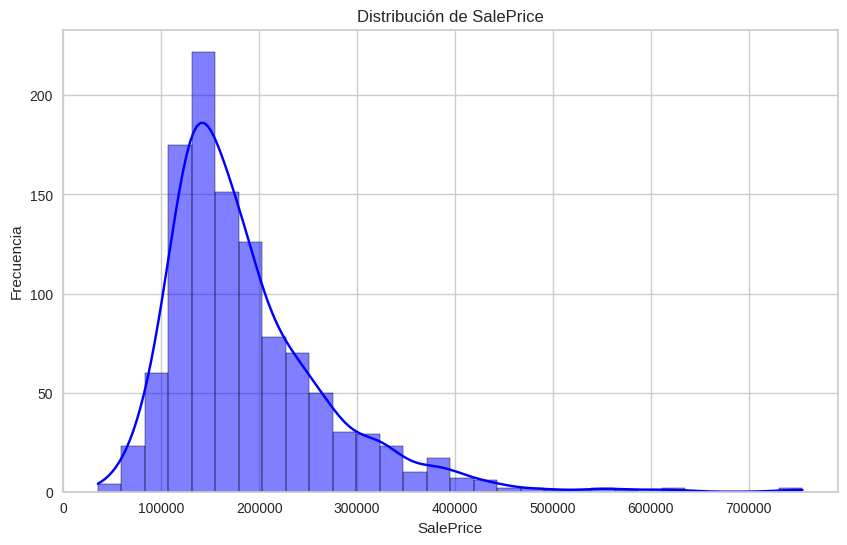

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned["SalePrice"], bins=30, kde=True, color="blue")
plt.xlabel("SalePrice")
plt.ylabel("Frecuencia")
plt.title("Distribución de SalePrice")
plt.show()

In [13]:
# División estratificada
train_set, test_set = train_test_split(df_cleaned, test_size=0.2, random_state=42, stratify=df_cleaned["SalePriceCategory"])

## Árbol de Regresion

Para esta primera prueba, se usará un arbol de regresión, usando todas las variables, las variables categóricas se a "númericas" al dividirlas en columnas dicotómicas. Se empezara clasificando los diferentes tipos de columnas para hacer un procesador que luego ayudar aa entrenar a los modelos.

In [ ]:
# COLUMN CLASIFICATION IN CATEGORICAL OR NUMERICAL 
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(df_cleaned)
categorical_columns = categorical_columns_selector(df_cleaned)

X_train = train_set.drop(["SalePrice", "SalePriceCategory"], axis=1)
y_train = train_set["SalePrice"]

X_test = train_set.drop(["SalePrice", "SalePriceCategory"], axis=1)
y_test = train_set["SalePrice"]

Posteriormente, se procecera a crear varios con profundidades desde el 2 a 20 niveles, priorizando el estadístico de r2, dado que queremos compararlo con los algoritmos de regresión hechos previamente.

In [77]:
# Preprocessor for converting categorical variables
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns)])

# Define the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

# Define the parameter grid for max_depth
param_grid = {
    "regressor__max_depth": list(range(2, 20))  # Testing depths from 2 to 19
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1, return_train_score=True)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the top 3 best models
cv_results = grid_search.cv_results_
sorted_indices = cv_results['rank_test_score'].argsort()[:3]  # Top 3 models

# Create an empty list to store the results
top_models_list = []

# Store the results in the list
for i, idx in enumerate(sorted_indices, 1):
    best_params = grid_search.cv_results_['params'][idx]
    best_model = grid_search.best_estimator_.set_params(**best_params)  # Get the best model
    best_model.fit(X_train, y_train)  # Retrain on the full dataset
    
    # Make predictions
    y_pred = best_model.predict(X_test)
    
    # Compute regression metrics
    explained_variance = explained_variance_score(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    # Append the metrics as a dictionary to the list
    top_models_list.append({
        'Model': f'Model {i}',
        'Max Depth': best_params['regressor__max_depth'],
        'Explained Variance': explained_variance,
        'R2': r2,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse
    })

# Convert the list of results to a DataFrame
top_models_df = pd.DataFrame(top_models_list)

# Display the DataFrame with the top 3 models
top_models_df

,Model,Max Depth,Explained Variance,R2,MAE,MSE,RMSE
0,Model 1,4,0.716637,0.716637,30961.732725,1.895876e+09,43541.659847
1,Model 2,3,0.655509,0.655509,34374.355529,2.304858e+09,48008.936980
2,Model 3,6,0.819996,0.819996,25231.616871,1.204342e+09,34703.626351


De los 19 modelos hechos, se escogieron los 3 mejores, del cual, parece que un árbol hecho con **6 niveles** de profundidad es el que mejora los estadísticos, a un punto que mejora los resultados hechos con los métodos de regresión previos, que alcanzaron un $R^2=0.71$ y $rmse = \$40410$ en los mejores casos.

Pero ¿Se puede mejorar? Los árboles de decisión son conocidos por su tendencia a sobre ajustarse, y una solución común es hacer varios decisión trees con diferentes hiperparametros, para luego promediar los resultados, lo que tambien es conocido como un _Random Forest_. A continuación se creara un random forest con los siguientes parametros

- No arboles = 100
- Profundidad Maxima de cada arbol = 8


In [78]:
# Define the Random Forest model
random_forest = RandomForestRegressor(n_estimators=100, max_depth=8, random_state=42)

# Define the pipeline with RandomForestRegressor
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', random_forest)
])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Compute regression metrics
explained_variance = explained_variance_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Store the metrics in a DataFrame
metrics_df = pd.DataFrame({
    'Model': ['Random Forest'],
    'Explained Variance': [explained_variance],
    'R2': [r2],
    'MAE': [mae],
    'MSE': [mse],
    'RMSE': [rmse]
})

metrics_df

,Model,Explained Variance,R2,MAE,MSE,RMSE
0,Random Forest,0.901987,0.901982,18819.71052,6.558007e+08,25608.606516


El _random forest_ tuvo muy buenos resultados en el conjunto de prueba, con un $R^2$ que supera grandemente a las regresiones lineales pasadas, así como a los árboles individuales. Lo que indica que este puede ser un buen modelo para la predicción de precios de casas. Pero todavía se puede probar opciónes, a continuación se trabajara con modelos de arboles de clasificación.

## Árbol de clasificación

In [ ]:
df_cleaned.groupby('SalePriceCategory').size()

C:\Users\Gerax\AppData\Local\Temp\ipykernel_23988\263925595.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_cleaned.groupby('SalePriceCategory').size()


SalePriceCategory
Económico     365
Intermedio    364
Caro          365
dtype: int64

In [ ]:
random.seed(42)
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(df_cleaned)
categorical_columns = categorical_columns_selector(df_cleaned)
categorical_columns

categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns)])

In [ ]:
df_cleaned["SalePriceCategory"] = df_cleaned["SalePriceCategory"].astype("category")
train_set, test_set = train_test_split(df_cleaned, test_size=0.3, random_state=42, stratify=df_cleaned["SalePriceCategory"])

C:\Users\Gerax\AppData\Local\Temp\ipykernel_23988\1798077989.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["SalePriceCategory"] = df_cleaned["SalePriceCategory"].astype("category")


In [ ]:
y_train = train_set["SalePriceCategory"].copy()

x_train = train_set.drop(columns=["SalePriceCategory", "SalePrice"]).copy()

for col in x_train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    x_train[col] = le.fit_transform(x_train[col])

param_grid = {"max_depth": np.arange(2, 10, 1)}
pipeline = Pipeline(
    [('preprocessor',preprocessor),
     ('regressor',DecisionTreeClassifier(random_state=1))])
params = [{
    "regressor__max_depth": np.arange(2, 10, 1)
}]


In [ ]:
modelo1 = GridSearchCV(pipeline, param_grid=params, n_jobs=2, cv=5,scoring="accuracy")
modelo1.fit(x_train,y_train)
modelo1.best_params_

{'regressor__max_depth': 6}

A partir de la validación cruzada realizada con GridSearchCV, se encontró que el mejor valor para la profundidad máxima del modelo DecisionTreeClassifier es 6. Esto se determinó utilizando un esquema de validación cruzada de 5 particiones y la métrica de accuracy como criterio de evaluación.

In [ ]:
arbol = DecisionTreeClassifier(max_depth=6, random_state=1) 
arbol = arbol.fit(x_train, y_train) 

[Text(0.5052083333333334, 0.9285714285714286, 'OverallQual <= 6.5\ngini = 0.667\nsamples = 765\nvalue = [255, 255, 255]\nclass = Económico'),
 Text(0.2708333333333333, 0.7857142857142857, 'GarageCars <= 1.5\ngini = 0.547\nsamples = 448\nvalue = [30.0, 246.0, 172.0]\nclass = Intermedio'),
 Text(0.38802083333333337, 0.8571428571428572, 'True  '),
 Text(0.11805555555555555, 0.6428571428571429, '1stFlrSF <= 1240.0\ngini = 0.317\nsamples = 202\nvalue = [3, 163, 36]\nclass = Intermedio'),
 Text(0.06944444444444445, 0.5, 'ScreenPorch <= 213.0\ngini = 0.21\nsamples = 177\nvalue = [1, 156, 20]\nclass = Intermedio'),
 Text(0.05555555555555555, 0.35714285714285715, '2ndFlrSF <= 643.5\ngini = 0.187\nsamples = 174\nvalue = [1, 156, 17]\nclass = Intermedio'),
 Text(0.027777777777777776, 0.21428571428571427, 'TotalBsmtSF <= 1041.0\ngini = 0.124\nsamples = 151\nvalue = [0, 141, 10]\nclass = Intermedio'),
 Text(0.013888888888888888, 0.07142857142857142, 'gini = 0.045\nsamples = 129\nvalue = [0, 126, 3]

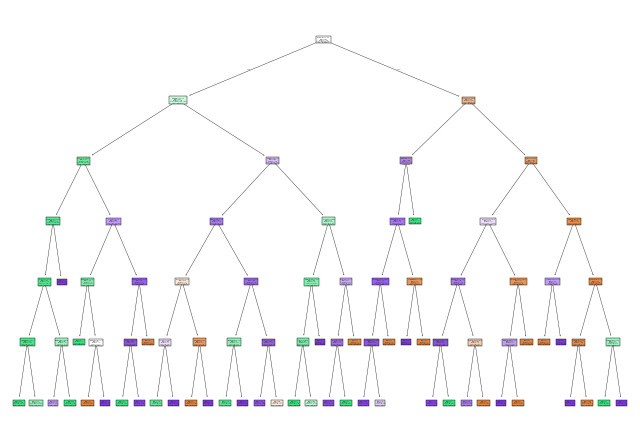

In [ ]:
tree.plot_tree(arbol,feature_names=x_train.columns,
               class_names=["Económico", "Intermedio", "Caro"],filled=True )

In [ ]:
y_test = test_set["SalePriceCategory"].copy()

x_test = test_set.drop(columns=["SalePriceCategory", "SalePrice"]).copy()

for col in x_test.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    x_test[col] = le.fit_transform(x_test[col])

y_pred = arbol.predict(x_test)
print ("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print ("Precision:", metrics.precision_score(y_test,y_pred,average='weighted') )
print ("Recall: ", metrics.recall_score(y_test,y_pred,average='weighted'))

Accuracy: 0.790273556231003
Precision: 0.7898754153356679
Recall:  0.790273556231003


El modelo tiene un desempeño bastante decente con un 79% de precisión y recall. Podemos afirmar que no existe sobreajuste pero si existe cierto margen de mejora. Ademas que el conjunto de datos esta bien balanceado porque el precission y el recal tiene casi los mismos valores significado que los existe equilibrio entre falsos negativos y positivos.

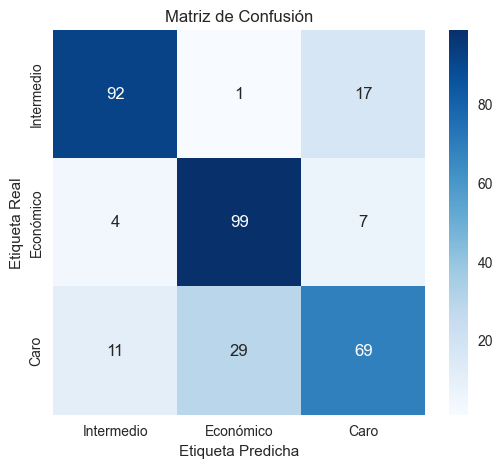

In [ ]:

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")
plt.title("Matriz de Confusión")
plt.show()


Se puede observar como el mejor modelo se confundio de distintas formas en las clases:

En intermedia clasifico correctamente 92 veces, clasifico 1 vez como economico y 17 veces como caro. Podemos afirmar que para el modelo en "intermedio" es bastante precisio. En cuanto a Economico.

En economico detecto 4 como intermedio, 99 las clasifico correctamente y 7 las clasificó como caro. Se puede decir que el modelo es bastante precisio cuando se trata de la clasificacion "economica".

En caro clasifico 69 de los casos correctamente y en 40 casos se confundio. Este seria la peor prediccion de las 3 etiquetas. Puede deberse a que la poblacion de casos caros sea inferior a las demas.

Al haber usado validacion cruzada desde el inicio no es necesario volver a repetir el ejercicio de probar otrao modelo pero usando la valizacion cruzada.

Otros 3 modelos:

In [ ]:
random.seed(42)
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(df_cleaned)
categorical_columns = categorical_columns_selector(df_cleaned)
categorical_columns

categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns)])

y_train = train_set["SalePriceCategory"].copy()

x_train = train_set.drop(columns=["SalePriceCategory", "SalePrice"]).copy()

for col in x_train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    x_train[col] = le.fit_transform(x_train[col])


## modelo 1

In [ ]:
param_grid = {"max_depth": np.arange(2, 10, 1)}
pipeline = Pipeline(
    [('preprocessor',preprocessor),
     ('regressor',DecisionTreeClassifier(random_state=400))])
params = [{
    "regressor__max_depth": np.arange(2, 10, 1)
}]

modelo1 = GridSearchCV(pipeline, param_grid=params, n_jobs=2, cv=5,scoring="accuracy")
modelo1.fit(x_train,y_train)
modelo1.best_params_

{'regressor__max_depth': 8}

In [ ]:
arbol = DecisionTreeClassifier(max_depth=8, random_state=400) 
arbol = arbol.fit(x_train, y_train) 

y_test = test_set["SalePriceCategory"].copy()

x_test = test_set.drop(columns=["SalePriceCategory", "SalePrice"]).copy()

for col in x_test.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    x_test[col] = le.fit_transform(x_test[col])

y_pred = arbol.predict(x_test)
print ("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print ("Precision:", metrics.precision_score(y_test,y_pred,average='weighted') )
print ("Recall: ", metrics.recall_score(y_test,y_pred,average='weighted'))

Accuracy: 0.7720364741641338
Precision: 0.7688139811050145
Recall:  0.7720364741641338


## Modelo 2

In [ ]:
param_grid = {"max_depth": np.arange(2, 10, 1)}
pipeline = Pipeline(
    [('preprocessor',preprocessor),
     ('regressor',DecisionTreeClassifier(random_state=88214))])
params = [{
    "regressor__max_depth": np.arange(2, 10, 1)
}]
modelo2 = GridSearchCV(pipeline, param_grid=params, n_jobs=2, cv=8,scoring="accuracy")
modelo2.fit(x_train,y_train)
modelo2.best_params_

{'regressor__max_depth': 6}

In [ ]:
arbol = DecisionTreeClassifier(max_depth=6, random_state=88214) 
arbol = arbol.fit(x_train, y_train) 

y_test = test_set["SalePriceCategory"].copy()

x_test = test_set.drop(columns=["SalePriceCategory", "SalePrice"]).copy()

for col in x_test.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    x_test[col] = le.fit_transform(x_test[col])

y_pred = arbol.predict(x_test)
print ("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print ("Precision:", metrics.precision_score(y_test,y_pred,average='weighted') )
print ("Recall: ", metrics.recall_score(y_test,y_pred,average='weighted'))

Accuracy: 0.7933130699088146
Precision: 0.792627126905651
Recall:  0.7933130699088146


## Modelo 3

In [ ]:
arbol = DecisionTreeClassifier(max_depth=9, random_state=88214) 
arbol = arbol.fit(x_train, y_train) 

y_test = test_set["SalePriceCategory"].copy()

x_test = test_set.drop(columns=["SalePriceCategory", "SalePrice"]).copy()

for col in x_test.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    x_test[col] = le.fit_transform(x_test[col])

y_pred = arbol.predict(x_test)
print ("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print ("Precision:", metrics.precision_score(y_test,y_pred,average='weighted') )
print ("Recall: ", metrics.recall_score(y_test,y_pred,average='weighted'))

Accuracy: 0.7872340425531915
Precision: 0.7859485048139203
Recall:  0.7872340425531915


Se utilizaron los valores más comunes obtenidos a partir de GridSearchCV, los cuales fluctuaban entre tres profundidades: 6, 9 y 8. Tras analizar los resultados, el mejor modelo fue el primero generado, con una accuracy, precisión y recall cercanos a 0.8. Aunque los demás modelos presentan ligeras variaciones en su desempeño, la profundidad óptima es 6, ya que ofrece los mejores resultados.

## Comparando el random Forest con el Arbol de clasificación

In [ ]:
param_grid = {"max_depth": np.arange(2, 10, 1)}
pipeline = Pipeline(
    [('preprocessor',preprocessor),
     ('regressor',RandomForestClassifier(random_state=88214))])
params = [{
    "regressor__max_depth": np.arange(2, 10, 1)
}]
modelo2 = GridSearchCV(pipeline, param_grid=params, n_jobs=2, cv=5,scoring="accuracy")
modelo2.fit(x_train,y_train)
modelo2.best_params_

{'regressor__max_depth': 8}

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=88214)

y_test = test_set["SalePriceCategory"].copy()

x_test = test_set.drop(columns=["SalePriceCategory", "SalePrice"]).copy()

for col in x_test.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    x_test[col] = le.fit_transform(x_test[col])

rf_model.fit(x_train, y_train)

# Hacer predicciones
y_pred = rf_model.predict(x_test)

# Evaluar el modelo
print ("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print ("Precision:", metrics.precision_score(y_test,y_pred,average='weighted') )
print ("Recall: ", metrics.recall_score(y_test,y_pred,average='weighted'))

Accuracy: 0.8297872340425532
Precision: 0.8328510202835869
Recall:  0.8297872340425532


Comparando el random Forest Tree con el Decision Tree Classifier se destacar que el modelo de Random Forest demostra un mejor desempeño en comparación con el árbol de decisión individual, por bastante, siendo mas efectivo en términos de accuracy (82.98% vs. 79.33%), precisión (83.29% vs. 79.26%) y recall (82.98% vs. 79.33%). Esto era de esperarse, ya que Random Forest combina múltiples árboles de decisión, reduciendo el sobreajuste y mejorando la capacidad de generalización. Mientras que el árbol de decisión individual puede ser más interpretable y rápido, su desempeño tiende a ser inferior debido a su mayor varianza. Por otro lado, Random Forest, al promediar múltiples árboles, es más robusto y estable, lo que explica el incremento en las métricas. En conclusión, el modelo de Random Forest es superior, proporcionando una mejor precisión sin sacrificar la capacidad de identificar correctamente las clases.